- Environment Setup

In [1]:
import numpy as np
import pandas as pd

# ignore warnings
import warnings
warnings.filterwarnings("ignore")

%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns

import wrangle

from wrangle import clean_311

import model

from model import split_separate_scale, dummy_dept, dummy_call_reason, make_source_id_dummies

pd.set_option("display.max_rows", None, "display.max_columns", None)

In [2]:
# plotting defaults
plt.rc('figure', figsize=(13, 7))
plt.style.use('seaborn-whitegrid')
plt.rc('font', size=16)

## Acquire and Prep

In [3]:
# acquire data
df = pd.read_csv('allservicecalls.csv')

In [4]:
df.head()

,Category,CASEID,OPENEDDATETIME,SLA_Date,CLOSEDDATETIME,Late (Yes/No),Dept,REASONNAME,TYPENAME,CaseStatus,SourceID,OBJECTDESC,Council District,XCOORD,YCOORD,Report Starting Date,Report Ending Date
0,Graffiti,1010444245,2012-08-15T00:00:00,2012-08-30T00:00:00,NaN,YES,Code Enforcement Services,Graffiti,Graffiti Public Property,Open,Web Portal,"600 NOGALITOS ST, San Antonio, 78204",5,2125683.0,13695548.0,2020-05-15T00:00:00,2021-05-15T00:00:00
1,Property Maintenance,1010888252,2013-06-06T00:00:00,2013-08-09T00:00:00,NaN,YES,Code Enforcement Services,Code Enforcement (IntExp),Alley-Way Maintenance,Open,Web Portal,"6043 CASTLE QUEEN, San Antonio, 78218",2,2169702.0,13725769.0,2020-05-15T00:00:00,2021-05-15T00:00:00
2,Property Maintenance,1010966128,2013-07-19T00:00:00,2013-09-23T00:00:00,NaN,YES,Code Enforcement Services,Code Enforcement (IntExp),Junk Vehicle On Private Property,Open,Web Portal,"842 KIRK PL, San Antonio, 78226",5,2116192.0,13692260.0,2020-05-15T00:00:00,2021-05-15T00:00:00
3,Property Maintenance,1011052825,2013-09-16T00:00:00,2013-09-30T00:00:00,NaN,YES,Code Enforcement Services,Code Enforcement,Right Of Way/Sidewalk Obstruction,Open,Internal Services Requests,"54 KENROCK RIDGE, San Antonio, 78254",7,2082242.0,13737817.0,2020-05-15T00:00:00,2021-05-15T00:00:00
4,Property Maintenance,1011052826,2013-09-16T00:00:00,2013-09-30T00:00:00,NaN,YES,Code Enforcement Services,Code Enforcement,Right Of Way/Sidewalk Obstruction,Open,Internal Services Requests,"74 KENROCK RIDGE, San Antonio, 78254",7,2082389.0,13737877.0,2020-05-15T00:00:00,2021-05-15T00:00:00


In [5]:
df.shape

(495440, 17)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 495440 entries, 0 to 495439
Data columns (total 17 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   Category              495440 non-null  object 
 1   CASEID                495440 non-null  int64  
 2   OPENEDDATETIME        495440 non-null  object 
 3   SLA_Date              481300 non-null  object 
 4   CLOSEDDATETIME        441387 non-null  object 
 5   Late (Yes/No)         495440 non-null  object 
 6   Dept                  445141 non-null  object 
 7   REASONNAME            495440 non-null  object 
 8   TYPENAME              495440 non-null  object 
 9   CaseStatus            495440 non-null  object 
 10  SourceID              495440 non-null  object 
 11  OBJECTDESC            495440 non-null  object 
 12  Council District      495440 non-null  int64  
 13  XCOORD                495345 non-null  float64
 14  YCOORD                495345 non-null  float64
 15  

In [7]:
df = clean_311(df)

In [8]:
df = dummy_dept(df)
df = dummy_call_reason(df)
df = make_source_id_dummies(df)

In [9]:
df.head()

,open_date,due_date,closed_date,is_late,dept,call_reason,case_type,case_status,source_id,address,council_district,longitude,latitude,days_open,resolution_days_due,days_before_or_after_due,pct_time_of_used,level_of_delay,district_1,district_2,district_3,district_4,district_5,district_6,district_7,district_8,district_9,district_10,voter_turnout_2019,num_of_registered_voters,zipcode,open_month,open_year,open_week,per_capita_income,square_miles,animal_care_services,code_enforcement_services,customer_services,development_services,metro_health,parks_and_rec,solid_waste_management,trans_and_cap_improvements,unknown_dept,buildings,business,cleanup,code,customer_service,field,land,license,misc,storm,streets,trades,traffic,waste,web_portal,311_mobile_app,constituent_call,internal_services_requests
0,2017-01-27,2017-02-03,2020-11-19,YES,Customer Service,customer_service,Complaint,Closed,Constituent Call,"2407 WYOMING ST, San Antonio, 78203",2,2142962.0,13699885.0,1392.0,8,-1385.0,174.000,Extremely Late Response,0,1,0,0,0,0,0,0,0,0,0.086,67656,78203,1,2017,4,19055,59.81,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0
1,2017-01-27,2017-02-03,2020-11-19,YES,Customer Service,customer_service,Complaint,Closed,Constituent Call,"5102 OLD PEARSALL, San Antonio, 78242",4,2097121.0,13678237.0,1392.0,8,-1385.0,174.000,Extremely Late Response,0,0,0,1,0,0,0,0,0,0,0.078,66370,78242,1,2017,4,18500,65.21,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0
2,2017-02-03,2017-02-10,2020-11-19,YES,Customer Service,customer_service,Complaint,Closed,Constituent Call,"2223 HOUSTON ST E, San Antonio, 78202",2,2140359.0,13702579.0,1385.0,8,-1378.0,173.125,Extremely Late Response,0,1,0,0,0,0,0,0,0,0,0.086,67656,78202,2,2017,5,19055,59.81,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0
3,2017-02-03,2017-02-10,2020-11-19,YES,Customer Service,customer_service,Complaint,Closed,Constituent Call,"2531 PEREZ, San Antonio, 78207",1,2117463.0,13706003.0,1385.0,8,-1378.0,173.125,Extremely Late Response,1,0,0,0,0,0,0,0,0,0,0.148,68081,78207,2,2017,5,23967,26.00,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0
4,2017-02-28,2017-03-07,2020-11-19,YES,Customer Service,customer_service,Complaint,Closed,Constituent Call,"8002 GRISSOM RD, San Antonio, 78251",6,2081307.0,13721187.0,1360.0,8,-1353.0,170.000,Extremely Late Response,0,0,0,0,0,1,0,0,0,0,0.124,80007,78251,2,2017,9,23437,38.44,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0


In [10]:
df.shape

(278554, 63)

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 278554 entries, 0 to 278553
Data columns (total 63 columns):
 #   Column                      Non-Null Count   Dtype         
---  ------                      --------------   -----         
 0   open_date                   278554 non-null  datetime64[ns]
 1   due_date                    278554 non-null  datetime64[ns]
 2   closed_date                 278554 non-null  datetime64[ns]
 3   is_late                     278554 non-null  object        
 4   dept                        278554 non-null  object        
 5   call_reason                 278554 non-null  object        
 6   case_type                   278554 non-null  object        
 7   case_status                 278554 non-null  object        
 8   source_id                   278554 non-null  object        
 9   address                     278554 non-null  object        
 10  council_district            278554 non-null  int64         
 11  longitude                   278554 non-

# Extract Month, Year, and Week from open_date

In [12]:
df['open_month'] = df.open_date.dt.month

In [13]:
df['open_year'] = df.open_date.dt.year

In [14]:
df['open_week'] = df.open_date.dt.week

In [15]:
df.head()

,open_date,due_date,closed_date,is_late,dept,call_reason,case_type,case_status,source_id,address,council_district,longitude,latitude,days_open,resolution_days_due,days_before_or_after_due,pct_time_of_used,level_of_delay,district_1,district_2,district_3,district_4,district_5,district_6,district_7,district_8,district_9,district_10,voter_turnout_2019,num_of_registered_voters,zipcode,open_month,open_year,open_week,per_capita_income,square_miles,animal_care_services,code_enforcement_services,customer_services,development_services,metro_health,parks_and_rec,solid_waste_management,trans_and_cap_improvements,unknown_dept,buildings,business,cleanup,code,customer_service,field,land,license,misc,storm,streets,trades,traffic,waste,web_portal,311_mobile_app,constituent_call,internal_services_requests
0,2017-01-27,2017-02-03,2020-11-19,YES,Customer Service,customer_service,Complaint,Closed,Constituent Call,"2407 WYOMING ST, San Antonio, 78203",2,2142962.0,13699885.0,1392.0,8,-1385.0,174.000,Extremely Late Response,0,1,0,0,0,0,0,0,0,0,0.086,67656,78203,1,2017,4,19055,59.81,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0
1,2017-01-27,2017-02-03,2020-11-19,YES,Customer Service,customer_service,Complaint,Closed,Constituent Call,"5102 OLD PEARSALL, San Antonio, 78242",4,2097121.0,13678237.0,1392.0,8,-1385.0,174.000,Extremely Late Response,0,0,0,1,0,0,0,0,0,0,0.078,66370,78242,1,2017,4,18500,65.21,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0
2,2017-02-03,2017-02-10,2020-11-19,YES,Customer Service,customer_service,Complaint,Closed,Constituent Call,"2223 HOUSTON ST E, San Antonio, 78202",2,2140359.0,13702579.0,1385.0,8,-1378.0,173.125,Extremely Late Response,0,1,0,0,0,0,0,0,0,0,0.086,67656,78202,2,2017,5,19055,59.81,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0
3,2017-02-03,2017-02-10,2020-11-19,YES,Customer Service,customer_service,Complaint,Closed,Constituent Call,"2531 PEREZ, San Antonio, 78207",1,2117463.0,13706003.0,1385.0,8,-1378.0,173.125,Extremely Late Response,1,0,0,0,0,0,0,0,0,0,0.148,68081,78207,2,2017,5,23967,26.00,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0
4,2017-02-28,2017-03-07,2020-11-19,YES,Customer Service,customer_service,Complaint,Closed,Constituent Call,"8002 GRISSOM RD, San Antonio, 78251",6,2081307.0,13721187.0,1360.0,8,-1353.0,170.000,Extremely Late Response,0,0,0,0,0,1,0,0,0,0,0.124,80007,78251,2,2017,9,23437,38.44,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0


In [16]:
df.open_month.value_counts()

6     29575
4     29039
3     28409
7     26923
5     25904
8     24430
9     20218
10    19780
1     18861
11    18527
12    18460
2     18428
Name: open_month, dtype: int64

In [17]:
df.open_year.value_counts()

2020    182556
2021     91299
2019      3100
2018      1216
2017       383
Name: open_year, dtype: int64

In [18]:
df.open_week.value_counts()

24    7130
12    7029
23    7026
14    6997
15    6922
25    6625
11    6457
13    6434
18    6417
16    6394
22    6371
28    6353
26    6305
29    6283
17    6094
32    6033
10    6004
33    5981
30    5969
21    5943
9     5819
31    5672
27    5643
34    5477
35    5465
8     5148
6     5051
36    4896
5     4889
47    4822
38    4819
49    4774
43    4758
1     4743
39    4662
4     4598
45    4548
41    4515
44    4500
3     4418
42    4359
37    4351
50    4340
46    4332
51    4316
40    4300
20    4258
2     4227
48    3787
19    3318
53    3215
52    3204
7     2563
Name: open_week, dtype: int64

In [19]:
def extract_time(df):
    '''
    This function will take in a dataframe and return it with new features extracted from the open_date column
    - open_month: which month the case was opened in
    - open_year: which year the case was opened in
    - open_week: which week the case was opened in
    '''
    
    # extract month from open_date
    df['open_month'] = df.open_date.dt.month
    
    # extract year from open_date
    df['open_year'] = df.open_date.dt.year
    
    # extract week from open_date
    df['open_week'] = df.open_date.dt.week
    
    return df

In [20]:
# acquire data
test_df = pd.read_csv('allservicecalls.csv')

In [21]:
test_df.head()

,Category,CASEID,OPENEDDATETIME,SLA_Date,CLOSEDDATETIME,Late (Yes/No),Dept,REASONNAME,TYPENAME,CaseStatus,SourceID,OBJECTDESC,Council District,XCOORD,YCOORD,Report Starting Date,Report Ending Date
0,Graffiti,1010444245,2012-08-15T00:00:00,2012-08-30T00:00:00,NaN,YES,Code Enforcement Services,Graffiti,Graffiti Public Property,Open,Web Portal,"600 NOGALITOS ST, San Antonio, 78204",5,2125683.0,13695548.0,2020-05-15T00:00:00,2021-05-15T00:00:00
1,Property Maintenance,1010888252,2013-06-06T00:00:00,2013-08-09T00:00:00,NaN,YES,Code Enforcement Services,Code Enforcement (IntExp),Alley-Way Maintenance,Open,Web Portal,"6043 CASTLE QUEEN, San Antonio, 78218",2,2169702.0,13725769.0,2020-05-15T00:00:00,2021-05-15T00:00:00
2,Property Maintenance,1010966128,2013-07-19T00:00:00,2013-09-23T00:00:00,NaN,YES,Code Enforcement Services,Code Enforcement (IntExp),Junk Vehicle On Private Property,Open,Web Portal,"842 KIRK PL, San Antonio, 78226",5,2116192.0,13692260.0,2020-05-15T00:00:00,2021-05-15T00:00:00
3,Property Maintenance,1011052825,2013-09-16T00:00:00,2013-09-30T00:00:00,NaN,YES,Code Enforcement Services,Code Enforcement,Right Of Way/Sidewalk Obstruction,Open,Internal Services Requests,"54 KENROCK RIDGE, San Antonio, 78254",7,2082242.0,13737817.0,2020-05-15T00:00:00,2021-05-15T00:00:00
4,Property Maintenance,1011052826,2013-09-16T00:00:00,2013-09-30T00:00:00,NaN,YES,Code Enforcement Services,Code Enforcement,Right Of Way/Sidewalk Obstruction,Open,Internal Services Requests,"74 KENROCK RIDGE, San Antonio, 78254",7,2082389.0,13737877.0,2020-05-15T00:00:00,2021-05-15T00:00:00


In [22]:
test_df = clean_311(test_df)

In [23]:
test_df.head()

,open_date,due_date,closed_date,is_late,dept,call_reason,case_type,case_status,source_id,address,council_district,longitude,latitude,days_open,resolution_days_due,days_before_or_after_due,pct_time_of_used,level_of_delay,district_1,district_2,district_3,district_4,district_5,district_6,district_7,district_8,district_9,district_10,voter_turnout_2019,num_of_registered_voters,zipcode,open_month,open_year,open_week,per_capita_income,square_miles
0,2017-01-27,2017-02-03,2020-11-19,YES,Customer Service,customer_service,Complaint,Closed,Constituent Call,"2407 WYOMING ST, San Antonio, 78203",2,2142962.0,13699885.0,1392.0,8,-1385.0,174.000,Extremely Late Response,0,1,0,0,0,0,0,0,0,0,0.086,67656,78203,1,2017,4,19055,59.81
1,2017-01-27,2017-02-03,2020-11-19,YES,Customer Service,customer_service,Complaint,Closed,Constituent Call,"5102 OLD PEARSALL, San Antonio, 78242",4,2097121.0,13678237.0,1392.0,8,-1385.0,174.000,Extremely Late Response,0,0,0,1,0,0,0,0,0,0,0.078,66370,78242,1,2017,4,18500,65.21
2,2017-02-03,2017-02-10,2020-11-19,YES,Customer Service,customer_service,Complaint,Closed,Constituent Call,"2223 HOUSTON ST E, San Antonio, 78202",2,2140359.0,13702579.0,1385.0,8,-1378.0,173.125,Extremely Late Response,0,1,0,0,0,0,0,0,0,0,0.086,67656,78202,2,2017,5,19055,59.81
3,2017-02-03,2017-02-10,2020-11-19,YES,Customer Service,customer_service,Complaint,Closed,Constituent Call,"2531 PEREZ, San Antonio, 78207",1,2117463.0,13706003.0,1385.0,8,-1378.0,173.125,Extremely Late Response,1,0,0,0,0,0,0,0,0,0,0.148,68081,78207,2,2017,5,23967,26.00
4,2017-02-28,2017-03-07,2020-11-19,YES,Customer Service,customer_service,Complaint,Closed,Constituent Call,"8002 GRISSOM RD, San Antonio, 78251",6,2081307.0,13721187.0,1360.0,8,-1353.0,170.000,Extremely Late Response,0,0,0,0,0,1,0,0,0,0,0.124,80007,78251,2,2017,9,23437,38.44


In [24]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 278554 entries, 0 to 278553
Data columns (total 36 columns):
 #   Column                    Non-Null Count   Dtype         
---  ------                    --------------   -----         
 0   open_date                 278554 non-null  datetime64[ns]
 1   due_date                  278554 non-null  datetime64[ns]
 2   closed_date               278554 non-null  datetime64[ns]
 3   is_late                   278554 non-null  object        
 4   dept                      278554 non-null  object        
 5   call_reason               278554 non-null  object        
 6   case_type                 278554 non-null  object        
 7   case_status               278554 non-null  object        
 8   source_id                 278554 non-null  object        
 9   address                   278554 non-null  object        
 10  council_district          278554 non-null  int64         
 11  longitude                 278554 non-null  float64       
 12  la

In [25]:
test_df = extract_time(test_df)

In [26]:
test_df.head()

,open_date,due_date,closed_date,is_late,dept,call_reason,case_type,case_status,source_id,address,council_district,longitude,latitude,days_open,resolution_days_due,days_before_or_after_due,pct_time_of_used,level_of_delay,district_1,district_2,district_3,district_4,district_5,district_6,district_7,district_8,district_9,district_10,voter_turnout_2019,num_of_registered_voters,zipcode,open_month,open_year,open_week,per_capita_income,square_miles
0,2017-01-27,2017-02-03,2020-11-19,YES,Customer Service,customer_service,Complaint,Closed,Constituent Call,"2407 WYOMING ST, San Antonio, 78203",2,2142962.0,13699885.0,1392.0,8,-1385.0,174.000,Extremely Late Response,0,1,0,0,0,0,0,0,0,0,0.086,67656,78203,1,2017,4,19055,59.81
1,2017-01-27,2017-02-03,2020-11-19,YES,Customer Service,customer_service,Complaint,Closed,Constituent Call,"5102 OLD PEARSALL, San Antonio, 78242",4,2097121.0,13678237.0,1392.0,8,-1385.0,174.000,Extremely Late Response,0,0,0,1,0,0,0,0,0,0,0.078,66370,78242,1,2017,4,18500,65.21
2,2017-02-03,2017-02-10,2020-11-19,YES,Customer Service,customer_service,Complaint,Closed,Constituent Call,"2223 HOUSTON ST E, San Antonio, 78202",2,2140359.0,13702579.0,1385.0,8,-1378.0,173.125,Extremely Late Response,0,1,0,0,0,0,0,0,0,0,0.086,67656,78202,2,2017,5,19055,59.81
3,2017-02-03,2017-02-10,2020-11-19,YES,Customer Service,customer_service,Complaint,Closed,Constituent Call,"2531 PEREZ, San Antonio, 78207",1,2117463.0,13706003.0,1385.0,8,-1378.0,173.125,Extremely Late Response,1,0,0,0,0,0,0,0,0,0,0.148,68081,78207,2,2017,5,23967,26.00
4,2017-02-28,2017-03-07,2020-11-19,YES,Customer Service,customer_service,Complaint,Closed,Constituent Call,"8002 GRISSOM RD, San Antonio, 78251",6,2081307.0,13721187.0,1360.0,8,-1353.0,170.000,Extremely Late Response,0,0,0,0,0,1,0,0,0,0,0.124,80007,78251,2,2017,9,23437,38.44


In [27]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 278554 entries, 0 to 278553
Data columns (total 36 columns):
 #   Column                    Non-Null Count   Dtype         
---  ------                    --------------   -----         
 0   open_date                 278554 non-null  datetime64[ns]
 1   due_date                  278554 non-null  datetime64[ns]
 2   closed_date               278554 non-null  datetime64[ns]
 3   is_late                   278554 non-null  object        
 4   dept                      278554 non-null  object        
 5   call_reason               278554 non-null  object        
 6   case_type                 278554 non-null  object        
 7   case_status               278554 non-null  object        
 8   source_id                 278554 non-null  object        
 9   address                   278554 non-null  object        
 10  council_district          278554 non-null  int64         
 11  longitude                 278554 non-null  float64       
 12  la

In [28]:
test_df.open_month.value_counts()

6     29575
4     29039
3     28409
7     26923
5     25904
8     24430
9     20218
10    19780
1     18861
11    18527
12    18460
2     18428
Name: open_month, dtype: int64

In [29]:
test_df.open_year.value_counts()

2020    182556
2021     91299
2019      3100
2018      1216
2017       383
Name: open_year, dtype: int64

In [30]:
test_df.open_week.value_counts()

24    7130
12    7029
23    7026
14    6997
15    6922
25    6625
11    6457
13    6434
18    6417
16    6394
22    6371
28    6353
26    6305
29    6283
17    6094
32    6033
10    6004
33    5981
30    5969
21    5943
9     5819
31    5672
27    5643
34    5477
35    5465
8     5148
6     5051
36    4896
5     4889
47    4822
38    4819
49    4774
43    4758
1     4743
39    4662
4     4598
45    4548
41    4515
44    4500
3     4418
42    4359
37    4351
50    4340
46    4332
51    4316
40    4300
20    4258
2     4227
48    3787
19    3318
53    3215
52    3204
7     2563
Name: open_week, dtype: int64

# Explore

<AxesSubplot:xlabel='open_week'>

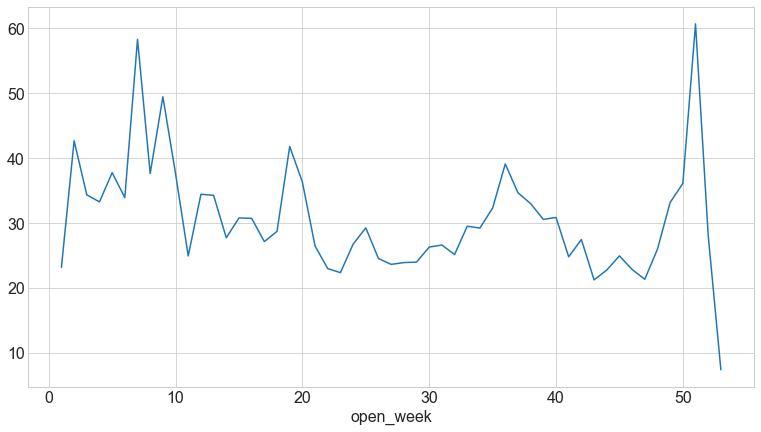

In [31]:
df.groupby('open_week').days_open.mean().plot()

<AxesSubplot:xlabel='open_month'>

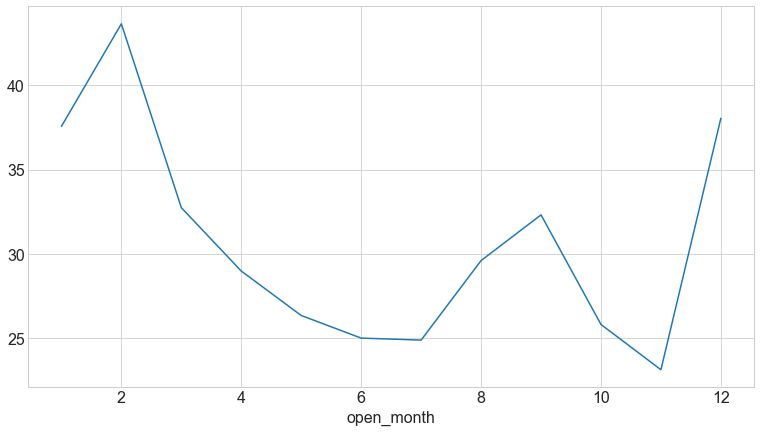

In [32]:
df.groupby('open_month').days_open.mean().plot()

In [33]:
df.groupby('open_month').call_reason.value_counts()

open_month  call_reason     
1           waste                9733
            code                 4424
            field                1520
            trades                703
            misc                  635
            streets               584
            traffic               501
            customer_service      323
            storm                 178
            land                   95
            business               78
            license                76
            buildings              11
2           waste                8091
            code                 4400
            field                3317
            trades                594
            misc                  544
            streets               509
            traffic               362
            customer_service      298
            storm                 125
            business               84
            land                   78
            buildings              13
            license  

In [34]:
df.groupby('open_month').dept.value_counts()

open_month  dept                     
1           Solid Waste Management       10462
            Development Services          4378
            Animal Care Services          1521
            Trans & Cap Improvements      1245
            Unknown                        816
            Customer Service               182
            Metro Health                   156
            Code Enforcement Services      101
2           Solid Waste Management        8736
            Development Services          4333
            Animal Care Services          3319
            Trans & Cap Improvements       959
            Unknown                        705
            Customer Service               163
            Code Enforcement Services      117
            Metro Health                    96
3           Solid Waste Management       17105
            Development Services          6349
            Animal Care Services          2050
            Trans & Cap Improvements      1393
            Unknown   

In [35]:
df.groupby('open_month').council_district.value_counts()

open_month  council_district
1           2                   2608
            3                   2528
            1                   2422
            5                   2377
            7                   1815
            4                   1797
            10                  1641
            6                   1537
            9                   1099
            8                   1037
2           2                   2588
            5                   2568
            3                   2461
            1                   2357
            4                   1850
            7                   1682
            10                  1538
            6                   1504
            8                    950
            9                    930
3           2                   3738
            3                   3359
            5                   3359
            1                   3354
            7                   2869
            10                  2828
         

In [36]:
df.groupby('open_month').level_of_delay.value_counts()

open_month  level_of_delay          
1           Extremely Early Response     8605
            Very Early Response          4348
            Late Response                2057
            Early Response               1778
            On Time Response             1745
            Very Late Response            260
            Extremely Late Response        68
2           Extremely Early Response     7202
            Late Response                4076
            Very Early Response          3716
            On Time Response             1377
            Early Response               1184
            Very Late Response            744
            Extremely Late Response       129
3           Extremely Early Response    11547
            Very Early Response          6360
            Late Response                3827
            Early Response               3105
            On Time Response             2850
            Very Late Response            556
            Extremely Late Response       1

In [37]:
df.groupby('open_month').is_late.value_counts()

open_month  is_late
1           NO         15278
            YES         3583
2           NO         12456
            YES         5972
3           NO         21852
            YES         6557
4           NO         22027
            YES         7012
5           NO         22001
            YES         3903
6           NO         25615
            YES         3960
7           NO         23574
            YES         3349
8           NO         20763
            YES         3667
9           NO         16660
            YES         3558
10          NO         16773
            YES         3007
11          NO         15979
            YES         2548
12          NO         15155
            YES         3305
Name: is_late, dtype: int64

In [38]:
# Statistical Tests
import scipy.stats as stats
from scipy.stats import norm

In [39]:
import math

from math import sqrt

In [40]:
def get_anova_test(train):
    n = train.shape[0]     # number of observations
    degf = n - 2        # degrees of freedom: the # of values in the final calculation of a statistic that are free to vary.
    conf_interval = .95 # desired confidence interval
    α = 1 - conf_interval
    null_hypothesis = 'there is no difference in days a case is open between the months a case is opened in.'
    F, p = stats.f_oneway( 
        train.days_open[train.open_month== 1],
        train.days_open[train.open_month== 2],
        train.days_open[train.open_month== 3],
        train.days_open[train.open_month== 4],
        train.days_open[train.open_month== 5],
        train.days_open[train.open_month== 6],
        train.days_open[train.open_month== 7], 
        train.days_open[train.open_month== 8], 
        train.days_open[train.open_month== 9], 
        train.days_open[train.open_month== 10],
        train.days_open[train.open_month== 11],
        train.days_open[train.open_month== 12]
        )
    if p > α:
        return print("We fail to reject the null hypothesis. The null hypothesis is that", null_hypothesis)
    else:
        return print("We reject the null hypothesis that", null_hypothesis)

In [41]:
get_anova_test(df)

We reject the null hypothesis that there is no difference in days a case is open between the months a case is opened in.


In [42]:
def get_anova_test(train):
    n = train.shape[0]     # number of observations
    degf = n - 2        # degrees of freedom: the # of values in the final calculation of a statistic that are free to vary.
    conf_interval = .95 # desired confidence interval
    α = 1 - conf_interval
    null_hypothesis = 'there is no difference in days a case is open between the year a case is opened in.'
    F, p = stats.f_oneway( 
        train.days_open[train.open_year== 2018],
        train.days_open[train.open_year== 2019],
        train.days_open[train.open_year== 2020],
        train.days_open[train.open_year== 2021]
        )
    if p > α:
        return print("We fail to reject the null hypothesis. The null hypothesis is that", null_hypothesis)
    else:
        return print("We reject the null hypothesis that", null_hypothesis)

In [43]:
get_anova_test(df)

We reject the null hypothesis that there is no difference in days a case is open between the year a case is opened in.


In [44]:
def get_anova_test(train):
    n = train.shape[0]     # number of observations
    degf = n - 2        # degrees of freedom: the # of values in the final calculation of a statistic that are free to vary.
    conf_interval = .95 # desired confidence interval
    α = 1 - conf_interval
    null_hypothesis = 'there is no difference in days a case is open between the week a case is opened in.'
    F, p = stats.f_oneway( 
        train.days_open[train.open_week== 1],
        train.days_open[train.open_week== 2],
        train.days_open[train.open_week== 3],
        train.days_open[train.open_week== 4],
        train.days_open[train.open_week== 5],
        train.days_open[train.open_week== 6],
        train.days_open[train.open_week== 7], 
        train.days_open[train.open_week== 8], 
        train.days_open[train.open_week== 9], 
        train.days_open[train.open_week== 10],
        train.days_open[train.open_week== 11],
        train.days_open[train.open_week== 12],
        train.days_open[train.open_week== 13],
        train.days_open[train.open_week== 14],
        train.days_open[train.open_week== 15],
        train.days_open[train.open_week== 16],
        train.days_open[train.open_week== 17], 
        train.days_open[train.open_week== 18], 
        train.days_open[train.open_week== 19], 
        train.days_open[train.open_week== 20],
        train.days_open[train.open_week== 21],
        train.days_open[train.open_week== 22],
        train.days_open[train.open_week== 23],
        train.days_open[train.open_week== 24],
        train.days_open[train.open_week== 25],
        train.days_open[train.open_week== 26],
        train.days_open[train.open_week== 27], 
        train.days_open[train.open_week== 28], 
        train.days_open[train.open_week== 29], 
        train.days_open[train.open_week== 30],
        train.days_open[train.open_week== 31],
        train.days_open[train.open_week== 32],
        train.days_open[train.open_week== 33],
        train.days_open[train.open_week== 34],
        train.days_open[train.open_week== 35],
        train.days_open[train.open_week== 36],
        train.days_open[train.open_week== 37], 
        train.days_open[train.open_week== 38], 
        train.days_open[train.open_week== 39], 
        train.days_open[train.open_week== 40],
        train.days_open[train.open_week== 41],
        train.days_open[train.open_week== 42],
        train.days_open[train.open_week== 43],
        train.days_open[train.open_week== 44],
        train.days_open[train.open_week== 45],
        train.days_open[train.open_week== 46],
        train.days_open[train.open_week== 47], 
        train.days_open[train.open_week== 48], 
        train.days_open[train.open_week== 49], 
        train.days_open[train.open_week== 50],
        train.days_open[train.open_week== 51],
        train.days_open[train.open_week== 52],
        train.days_open[train.open_week== 53]
        )
    if p > α:
        return print("We fail to reject the null hypothesis. The null hypothesis is that", null_hypothesis)
    else:
        return print("We reject the null hypothesis that", null_hypothesis)

In [45]:
get_anova_test(df)

We reject the null hypothesis that there is no difference in days a case is open between the week a case is opened in.


In [46]:
H0 = 'there is no difference in days a case is open between month 1 and the rest of the population'

H1 = 'there is a significant difference between the days a case is open between month 1 and the general population'

alpha = .05

month1 = df[df['open_month'] == 1]

μ = df.days_open.mean()
xbar = month1.days_open.mean()
s = month1.days_open.std()
n = month1.shape[0]
degf = n - 1
standard_error = s / sqrt(n)

t = (xbar - μ) / (s / sqrt(n))

p = stats.t(degf).sf(t) * 2 # *2 for two-tailed test

print(t)
print(p)
if p < alpha:
    print(H1)
else:
    print(H0)

8.240268009295816
1.829539367388724e-16
there is a significant difference between the days a case is open between month 1 and the general population


In [47]:
H0 = 'there is no difference in days a case is open between month 2 and the rest of the population'

H1 = 'there is a significant difference between the days a case is open between month 2 and the general population'

alpha = .05

month2 = df[df['open_month'] == 2]

μ = df.days_open.mean()
xbar = month2.days_open.mean()
s = month2.days_open.std()
n = month2.shape[0]
degf = n - 1
standard_error = s / sqrt(n)

t = (xbar - μ) / (s / sqrt(n))

p = stats.t(degf).sf(t) * 2 # *2 for two-tailed test

print(t)
print(p)
if p < alpha:
    print(H1)
else:
    print(H0)

15.52225806722359
5.389511604451545e-54
there is a significant difference between the days a case is open between month 2 and the general population


In [48]:
H0 = 'there is no difference in days a case is open between month 3 and the rest of the population'

H1 = 'there is a significant difference between the days a case is open between month 3 and the general population'

alpha = .05

month3 = df[df['open_month'] == 3]

μ = df.days_open.mean()
xbar = month3.days_open.mean()
s = month3.days_open.std()
n = month3.shape[0]
degf = n - 1
standard_error = s / sqrt(n)

t = (xbar - μ) / (s / sqrt(n))

p = stats.t(degf).sf(t) * 2 # *2 for two-tailed test

print(t)
print(p)
if p < alpha:
    print(H1)
else:
    print(H0)

4.118200462941355
3.8292182463772565e-05
there is a significant difference between the days a case is open between month 3 and the general population


In [49]:
H0 = 'there is no difference in days a case is open between month 4 and the rest of the population'

H1 = 'there is a significant difference between the days a case is open between month 4 and the general population'

alpha = .05

month4 = df[df['open_month'] == 4]

μ = df.days_open.mean()
xbar = month4.days_open.mean()
s = month4.days_open.std()
n = month4.shape[0]
degf = n - 1
standard_error = s / sqrt(n)

t = (xbar - μ) / (s / sqrt(n))

p = stats.t(degf).sf(t) * 2 # *2 for two-tailed test

print(t)
print(p)
if p < alpha:
    print(H1)
else:
    print(H0)

-2.014988408191829
1.956084938134242
there is no difference in days a case is open between month 4 and the rest of the population


In [50]:
H0 = 'there is no difference in days a case is open between month 5 and the rest of the population'

H1 = 'there is a significant difference between the days a case is open between month 5 and the general population'

alpha = .05

month5 = df[df['open_month'] == 5]

μ = df.days_open.mean()
xbar = month5.days_open.mean()
s = month5.days_open.std()
n = month5.shape[0]
degf = n - 1
standard_error = s / sqrt(n)

t = (xbar - μ) / (s / sqrt(n))

p = stats.t(degf).sf(t) * 2 # *2 for two-tailed test

print(t)
print(p)
if p < alpha:
    print(H1)
else:
    print(H0)

-6.541520700715787
1.9999999999379683
there is no difference in days a case is open between month 5 and the rest of the population


In [51]:
H0 = 'there is no difference in days a case is open between month 6 and the rest of the population'

H1 = 'there is a significant difference between the days a case is open between month 6 and the general population'

alpha = .05

month6 = df[df['open_month'] == 6]

μ = df.days_open.mean()
xbar = month6.days_open.mean()
s = month6.days_open.std()
n = month6.shape[0]
degf = n - 1
standard_error = s / sqrt(n)

t = (xbar - μ) / (s / sqrt(n))

p = stats.t(degf).sf(t) * 2 # *2 for two-tailed test

print(t)
print(p)
if p < alpha:
    print(H1)
else:
    print(H0)

-10.630929871814848
2.0
there is no difference in days a case is open between month 6 and the rest of the population


In [52]:
H0 = 'there is no difference in days a case is open between month 7 and the rest of the population'

H1 = 'there is a significant difference between the days a case is open between month 7 and the general population'

alpha = .05

month7 = df[df['open_month'] == 7]

μ = df.days_open.mean()
xbar = month7.days_open.mean()
s = month7.days_open.std()
n = month7.shape[0]
degf = n - 1
standard_error = s / sqrt(n)

t = (xbar - μ) / (s / sqrt(n))

p = stats.t(degf).sf(t) * 2 # *2 for two-tailed test

print(t)
print(p)
if p < alpha:
    print(H1)
else:
    print(H0)

-10.297144688133338
2.0
there is no difference in days a case is open between month 7 and the rest of the population


In [53]:
H0 = 'there is no difference in days a case is open between month 8 and the rest of the population'

H1 = 'there is a significant difference between the days a case is open between month 8 and the general population'

alpha = .05

month8 = df[df['open_month'] == 8]

μ = df.days_open.mean()
xbar = month8.days_open.mean()
s = month8.days_open.std()
n = month8.shape[0]
degf = n - 1
standard_error = s / sqrt(n)

t = (xbar - μ) / (s / sqrt(n))

p = stats.t(degf).sf(t) * 2 # *2 for two-tailed test

print(t)
print(p)
if p < alpha:
    print(H1)
else:
    print(H0)

-0.9366442598145044
1.6510491635737707
there is no difference in days a case is open between month 8 and the rest of the population


In [54]:
H0 = 'there is no difference in days a case is open between month 9 and the rest of the population'

H1 = 'there is a significant difference between the days a case is open between month 9 and the general population'

alpha = .05

month9 = df[df['open_month'] == 9]

μ = df.days_open.mean()
xbar = month9.days_open.mean()
s = month9.days_open.std()
n = month9.shape[0]
degf = n - 1
standard_error = s / sqrt(n)

t = (xbar - μ) / (s / sqrt(n))

p = stats.t(degf).sf(t) * 2 # *2 for two-tailed test

print(t)
print(p)
if p < alpha:
    print(H1)
else:
    print(H0)

3.2598670174763917
0.0011164873771900975
there is a significant difference between the days a case is open between month 9 and the general population


In [55]:
H0 = 'there is no difference in days a case is open between month 10 and the rest of the population'

H1 = 'there is a significant difference between the days a case is open between month 10 and the general population'

alpha = .05

month10 = df[df['open_month'] == 10]

μ = df.days_open.mean()
xbar = month10.days_open.mean()
s = month10.days_open.std()
n = month10.shape[0]
degf = n - 1
standard_error = s / sqrt(n)

t = (xbar - μ) / (s / sqrt(n))

p = stats.t(degf).sf(t) * 2 # *2 for two-tailed test

print(t)
print(p)
if p < alpha:
    print(H1)
else:
    print(H0)

-5.546578344966045
1.9999999704957399
there is no difference in days a case is open between month 10 and the rest of the population


In [56]:
H0 = 'there is no difference in days a case is open between month 11 and the rest of the population'

H1 = 'there is a significant difference between the days a case is open between month 11 and the general population'

alpha = .05

month11 = df[df['open_month'] == 11]

μ = df.days_open.mean()
xbar = month11.days_open.mean()
s = month11.days_open.std()
n = month11.shape[0]
degf = n - 1
standard_error = s / sqrt(n)

t = (xbar - μ) / (s / sqrt(n))

p = stats.t(degf).sf(t) * 2 # *2 for two-tailed test

print(t)
print(p)
if p < alpha:
    print(H1)
else:
    print(H0)

-9.411393367863157
2.0
there is no difference in days a case is open between month 11 and the rest of the population


In [57]:
H0 = 'there is no difference in days a case is open between month 12 and the rest of the population'

H1 = 'there is a significant difference between the days a case is open between month 12 and the general population'

alpha = .05

month12 = df[df['open_month'] == 12]

μ = df.days_open.mean()
xbar = month12.days_open.mean()
s = month12.days_open.std()
n = month12.shape[0]
degf = n - 1
standard_error = s / sqrt(n)

t = (xbar - μ) / (s / sqrt(n))

p = stats.t(degf).sf(t) * 2 # *2 for two-tailed test

print(t)
print(p)
if p < alpha:
    print(H1)
else:
    print(H0)

8.669630813127085
4.6884482100868356e-18
there is a significant difference between the days a case is open between month 12 and the general population


### Takeaways

- Winter months have the longest average case open time

- 'Waste' is continuously the most common reason across every month

- District 2 has the most cases opened during the Winter and Spring months

- District 5 has the most cases opened during the Autumn months 

- Feb, March, and April have the most cases categorized as late

- There does appear to be a significance between month a case is opened and days a case remains open

- Jan, Feb, March, Sep, and Dec are the only months with significant differences in days open compared to the population

- We can reject the null hypothesis that year and week are not significant to days open

# Modeling

In [58]:
from sklearn.metrics import classification_report, accuracy_score

In [59]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

## Split Data

In [60]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 278554 entries, 0 to 278553
Data columns (total 63 columns):
 #   Column                      Non-Null Count   Dtype         
---  ------                      --------------   -----         
 0   open_date                   278554 non-null  datetime64[ns]
 1   due_date                    278554 non-null  datetime64[ns]
 2   closed_date                 278554 non-null  datetime64[ns]
 3   is_late                     278554 non-null  object        
 4   dept                        278554 non-null  object        
 5   call_reason                 278554 non-null  object        
 6   case_type                   278554 non-null  object        
 7   case_status                 278554 non-null  object        
 8   source_id                   278554 non-null  object        
 9   address                     278554 non-null  object        
 10  council_district            278554 non-null  int64         
 11  longitude                   278554 non-

In [61]:
train, validate, test, X_train, y_train, X_validate, y_validate, X_test, y_test, train_scaled, validate_scaled, test_scaled = split_separate_scale(df)

In [62]:
train.head()

,open_date,due_date,closed_date,is_late,dept,call_reason,case_type,case_status,source_id,address,council_district,longitude,latitude,days_open,resolution_days_due,days_before_or_after_due,pct_time_of_used,level_of_delay,district_1,district_2,district_3,district_4,district_5,district_6,district_7,district_8,district_9,district_10,voter_turnout_2019,num_of_registered_voters,zipcode,open_month,open_year,open_week,per_capita_income,square_miles,animal_care_services,code_enforcement_services,customer_services,development_services,metro_health,parks_and_rec,solid_waste_management,trans_and_cap_improvements,unknown_dept,buildings,business,cleanup,code,customer_service,field,land,license,misc,storm,streets,trades,traffic,waste,web_portal,311_mobile_app,constituent_call,internal_services_requests
224814,2021-03-05,2021-03-11,2021-03-06,NO,Solid Waste Management,waste,No Pickup,Closed,Web Portal,"1810 TARTON, SAN ANTONIO, 78231",9,2119872.0,13748436.0,1.0,7,5.0,0.142857,Extremely Early Response,0,0,0,0,0,0,0,0,1,0,0.185,99309,78231,3,2021,9,42559,48.71,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1
10677,2020-03-31,2020-05-30,2020-06-17,YES,Animal Care Services,field,Animals(Stray Animal),Closed,Web Portal,"3734 LITCHFIELD, SAN ANTONIO, 78230",9,2110542.0,13738901.0,78.0,61,-18.0,1.278689,Late Response,0,0,0,0,0,0,0,0,1,0,0.185,99309,78230,3,2020,14,42559,48.71,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1
15188,2020-05-05,2020-10-23,2020-07-07,NO,Development Services,code,Structure Maintenance Multi-Tenant (Interior),Closed,Web Portal,"250 HEIMER RD, SAN ANTONIO, 78232",9,2134886.0,13753239.0,63.0,172,108.0,0.366279,Very Early Response,0,0,0,0,0,0,0,0,1,0,0.185,99309,78232,5,2020,19,42559,48.71,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1
242415,2021-03-27,2021-04-05,2021-04-02,NO,Solid Waste Management,waste,Out of Cycle(Leaves No Fee),Closed,Web Portal,"3314 LITCHFIELD, SAN ANTONIO, 78230",9,2111970.0,13740514.0,6.0,10,3.0,0.600000,Early Response,0,0,0,0,0,0,0,0,1,0,0.185,99309,78230,3,2021,12,42559,48.71,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1
250743,2021-04-06,2021-04-08,2021-04-07,NO,Solid Waste Management,misc,Dead Animal Pick Up,Closed,Web Portal,"407 MARY ST, SAN ANTONIO, 78214",5,2129850.0,13685212.0,1.0,3,1.0,0.333333,Very Early Response,0,0,0,0,1,0,0,0,0,0,0.085,61418,78214,4,2021,14,13836,22.24,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1


In [63]:
X_train.head()

,open_date,due_date,closed_date,is_late,dept,call_reason,case_type,case_status,source_id,address,council_district,longitude,latitude,days_open,resolution_days_due,days_before_or_after_due,pct_time_of_used,district_1,district_2,district_3,district_4,district_5,district_6,district_7,district_8,district_9,district_10,voter_turnout_2019,num_of_registered_voters,zipcode,open_month,open_year,open_week,per_capita_income,square_miles,animal_care_services,code_enforcement_services,customer_services,development_services,metro_health,parks_and_rec,solid_waste_management,trans_and_cap_improvements,unknown_dept,buildings,business,cleanup,code,customer_service,field,land,license,misc,storm,streets,trades,traffic,waste,web_portal,311_mobile_app,constituent_call,internal_services_requests
224814,2021-03-05,2021-03-11,2021-03-06,NO,Solid Waste Management,waste,No Pickup,Closed,Web Portal,"1810 TARTON, SAN ANTONIO, 78231",9,2119872.0,13748436.0,1.0,7,5.0,0.142857,0,0,0,0,0,0,0,0,1,0,0.185,99309,78231,3,2021,9,42559,48.71,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1
10677,2020-03-31,2020-05-30,2020-06-17,YES,Animal Care Services,field,Animals(Stray Animal),Closed,Web Portal,"3734 LITCHFIELD, SAN ANTONIO, 78230",9,2110542.0,13738901.0,78.0,61,-18.0,1.278689,0,0,0,0,0,0,0,0,1,0,0.185,99309,78230,3,2020,14,42559,48.71,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1
15188,2020-05-05,2020-10-23,2020-07-07,NO,Development Services,code,Structure Maintenance Multi-Tenant (Interior),Closed,Web Portal,"250 HEIMER RD, SAN ANTONIO, 78232",9,2134886.0,13753239.0,63.0,172,108.0,0.366279,0,0,0,0,0,0,0,0,1,0,0.185,99309,78232,5,2020,19,42559,48.71,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1
242415,2021-03-27,2021-04-05,2021-04-02,NO,Solid Waste Management,waste,Out of Cycle(Leaves No Fee),Closed,Web Portal,"3314 LITCHFIELD, SAN ANTONIO, 78230",9,2111970.0,13740514.0,6.0,10,3.0,0.600000,0,0,0,0,0,0,0,0,1,0,0.185,99309,78230,3,2021,12,42559,48.71,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1
250743,2021-04-06,2021-04-08,2021-04-07,NO,Solid Waste Management,misc,Dead Animal Pick Up,Closed,Web Portal,"407 MARY ST, SAN ANTONIO, 78214",5,2129850.0,13685212.0,1.0,3,1.0,0.333333,0,0,0,0,1,0,0,0,0,0,0.085,61418,78214,4,2021,14,13836,22.24,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1


In [64]:
train_scaled.head()

,resolution_days_due,district_1,district_2,district_3,district_4,district_5,district_6,district_7,district_8,district_9,district_10,voter_turnout_2019,num_of_registered_voters,open_month,open_year,open_week,per_capita_income,square_miles,animal_care_services,code_enforcement_services,customer_services,development_services,metro_health,parks_and_rec,solid_waste_management,trans_and_cap_improvements,unknown_dept,buildings,business,cleanup,code,customer_service,field,land,license,misc,storm,streets,trades,traffic,waste,web_portal,311_mobile_app,constituent_call,internal_services_requests
0,0.010772,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.000000,1.0,0.181818,1.00,0.153846,1.0,0.281866,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
1,0.107720,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.000000,1.0,0.181818,0.75,0.250000,1.0,0.281866,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2,0.307002,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.000000,1.0,0.363636,0.75,0.346154,1.0,0.281866,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3,0.016158,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.000000,1.0,0.181818,1.00,0.211538,1.0,0.281866,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
4,0.003591,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.065421,0.0,0.272727,1.00,0.250000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


### Establish Baseline

In [65]:
# look at values of target variable

y_train.value_counts()

Extremely Early Response    74668
Very Early Response         35777
Late Response               17032
Early Response              13609
On Time Response            11761
Very Late Response           2510
Extremely Late Response       633
Name: level_of_delay, dtype: int64

In [66]:
# set up as dataframes
y_train = pd.DataFrame(dict(actual=y_train))
y_validate = pd.DataFrame(dict(actual=y_validate))
y_test = pd.DataFrame(dict(actual=y_test))

In [67]:
# 'Extremely Early Response' is by far the most frequent value so that will be our baseline
y_train['baseline'] = 'Extremely Early Response'

In [68]:
y_train.head()

,actual,baseline
224814,Extremely Early Response,Extremely Early Response
10677,Late Response,Extremely Early Response
15188,Very Early Response,Extremely Early Response
242415,Early Response,Extremely Early Response
250743,Very Early Response,Extremely Early Response


In [69]:
# calculate accuracy of baseline

print(' Baseline Accuracy: {:.2%}'.format(accuracy_score(y_train.actual, y_train.baseline)))
print('---')
print('Confusion Matrix')
print(pd.crosstab(y_train.baseline, y_train.actual))
print('---')
print(classification_report(y_train.actual, y_train.baseline))

 Baseline Accuracy: 47.87%
---
Confusion Matrix
actual                    Extremely Early Response  Very Early Response  \
baseline                                                                  
Extremely Early Response                     74668                35777   

actual                    Early Response  On Time Response  Late Response  \
baseline                                                                    
Extremely Early Response           13609             11761          17032   

actual                    Very Late Response  Extremely Late Response  
baseline                                                               
Extremely Early Response                2510                      633  
---
                          precision    recall  f1-score   support

          Early Response       0.00      0.00      0.00     13609
Extremely Early Response       0.48      1.00      0.65     74668
 Extremely Late Response       0.00      0.00      0.00       633
         

#### Takeaways

- Using this iteration of of clean_311 the baseline accuracy drops from approx 75% to approx 48%

### Model 1 : Logistic Regression - Default Parameters / All Features

In [70]:
# make logistic regression object
log1 = LogisticRegression(random_state=123)

In [71]:
# fit logistic regression object to data
log1.fit(train_scaled, y_train.actual)

LogisticRegression(random_state=123)

In [72]:
# evaluate feature importance
print('Coefficient: \n', log1.coef_)
print('Intercept: \n', log1.intercept_)

Coefficient: 
 [[-2.58192468e+00 -2.19381576e-01 -1.62338243e-01 -4.67102639e-02
  -4.41639516e-01 -6.26813083e-01 -1.53077139e-01 -1.01961384e-01
   2.41290132e-02  1.05339956e-01 -1.01235596e-02 -2.37846389e-01
  -1.45890583e-01  8.65787803e-01  4.32135063e+00  6.64009619e-01
  -1.59812617e-01 -3.21626419e-01 -1.34345624e+00 -1.03152238e+00
  -8.97287777e-01  2.16523363e-01  7.58205965e-01 -8.53274648e-03
   5.36344542e-01 -9.39380123e-02  2.31087494e-01 -1.55513040e-01
  -1.76634858e-01  2.23635158e-02  4.85249371e-01 -9.74379808e-01
  -2.69406565e-01 -9.71782989e-02 -1.14031872e-01  1.75920996e-01
  -7.19464270e-02 -2.68068160e-02 -1.39100258e-02  5.35904881e-01
  -9.52206849e-01  2.09480256e-01 -7.79634504e-01 -5.10885908e-01
  -5.51535640e-01]
 [ 4.89580999e+00 -1.32770013e-01 -5.77202215e-01 -7.81936025e-02
  -1.75578443e-01 -3.28022512e-01 -2.24546709e-01 -2.70210370e-01
   8.13191329e-02  7.27674750e-02  1.38063662e-01 -2.48377709e-01
  -1.63289146e-01  7.89364620e-01  4.31079

In [73]:
# make predictions
y_train['log1_pred'] = log1.predict(train_scaled)
y_validate['log1_pred'] = log1.predict(validate_scaled)
y_test['log1_pred'] = log1.predict(test_scaled)

In [74]:
y_train.head()

,actual,baseline,log1_pred
224814,Extremely Early Response,Extremely Early Response,Extremely Early Response
10677,Late Response,Extremely Early Response,Late Response
15188,Very Early Response,Extremely Early Response,Extremely Early Response
242415,Early Response,Extremely Early Response,Extremely Early Response
250743,Very Early Response,Extremely Early Response,Very Early Response


- Evaluate Model

In [75]:
# calculate accuracy of log1 on train

print(' Log1 Accuracy: {:.5%}'.format(accuracy_score(y_train.actual, y_train.log1_pred)))
print('---')
print('Confusion Matrix')
print(pd.crosstab(y_train.log1_pred, y_train.actual))
print('---')
print(classification_report(y_train.actual, y_train.log1_pred))

 Log1 Accuracy: 53.32778%
---
Confusion Matrix
actual                    Extremely Early Response  Very Early Response  \
log1_pred                                                                 
Early Response                                  20                   20   
Extremely Early Response                     70379                26906   
Extremely Late Response                          0                    0   
Late Response                                 2070                 2315   
Very Early Response                           2138                 6497   
Very Late Response                              61                   39   

actual                    Early Response  On Time Response  Late Response  \
log1_pred                                                                   
Early Response                        41                23             17   
Extremely Early Response           11067              9749          10004   
Extremely Late Response                0    

In [76]:
# calculate accuracy of log1 on validate

print(' Log1 Accuracy: {:.5%}'.format(accuracy_score(y_validate.actual, y_validate.log1_pred)))
print('---')
print('Confusion Matrix')
print(pd.crosstab(y_validate.log1_pred, y_validate.actual))
print('---')
print(classification_report(y_validate.actual, y_validate.log1_pred))

 Log1 Accuracy: 53.55033%
---
Confusion Matrix
actual                    Extremely Early Response  Very Early Response  \
log1_pred                                                                 
Early Response                                  10                    8   
Extremely Early Response                     30188                11436   
Extremely Late Response                          0                    0   
Late Response                                  879                 1058   
On Time Response                                 0                    0   
Very Early Response                            896                 2815   
Very Late Response                              27                   16   

actual                    Early Response  On Time Response  Late Response  \
log1_pred                                                                   
Early Response                        13                10              2   
Extremely Early Response            4749      

#### Takeaways

- this model performs better on unseen validate data than the baseline by about 6%

- This model is less accuarate than the same model on iteration 1

### Feature Engineering

In [77]:
from sklearn.feature_selection import SelectKBest

In [78]:
f_selector = SelectKBest(k=8)

In [79]:
f_selector.fit(train_scaled, y_train.actual)

SelectKBest(k=8)

In [80]:
X_reduced = f_selector.transform(train_scaled)

print(train_scaled.shape)
print(X_reduced.shape)

(155990, 45)
(155990, 8)


In [81]:
f_support = f_selector.get_support()

print(f_support) 

[False False False False False False False False False False False False
 False False  True False False False  True False  True False False False
  True False False False False False False  True  True False False  True
 False False False False False False  True False False]


In [82]:
f_feature = train_scaled.loc[:,f_support].columns.tolist()

# you could also get the list this way (among many others)
# f_feature = [X_train_scaled.columns.values[i] for i in range(len(feature_mask)) if feature_mask[i]==True]

print(str(len(f_feature)), 'selected features')
print(f_feature)

8 selected features
['open_year', 'animal_care_services', 'customer_services', 'solid_waste_management', 'customer_service', 'field', 'misc', '311_mobile_app']


In [83]:
train_scaled.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 155990 entries, 0 to 155989
Data columns (total 45 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   resolution_days_due         155990 non-null  float64
 1   district_1                  155990 non-null  float64
 2   district_2                  155990 non-null  float64
 3   district_3                  155990 non-null  float64
 4   district_4                  155990 non-null  float64
 5   district_5                  155990 non-null  float64
 6   district_6                  155990 non-null  float64
 7   district_7                  155990 non-null  float64
 8   district_8                  155990 non-null  float64
 9   district_9                  155990 non-null  float64
 10  district_10                 155990 non-null  float64
 11  voter_turnout_2019          155990 non-null  float64
 12  num_of_registered_voters    155990 non-null  float64
 13  open_month    

#### Takeaways 

- 'days_before_or_after_due' and 'pct_time_of_used' are likely answer leak

- ['open_year', 'animal_care_services', 'customer_services', 'solid_waste_management', 'customer_service', 'field', 'misc', '311_mobile_app'] with dummies

- ['resolution_days_due', 'district_2', 'voter_turnout_2019', 'num_of_registered_voters', 'open_month', 'open_year', 'open_week', 'per_capita_income'] - without dummies

### Model 2 : Logistic Regression - Default Parameters / Select K Best Features (With Dummies)

In [85]:
# make model 2 subsets

model2_train = train_scaled[['open_year', 'animal_care_services', 'customer_services', 'solid_waste_management', 'customer_service', 'field', 'misc', '311_mobile_app']]

model2_validate = validate_scaled[['open_year', 'animal_care_services', 'customer_services', 'solid_waste_management', 'customer_service', 'field', 'misc', '311_mobile_app']]

model2_test = test_scaled[['open_year', 'animal_care_services', 'customer_services', 'solid_waste_management', 'customer_service', 'field', 'misc', '311_mobile_app']]



In [86]:
model2_train.head()

,open_year,animal_care_services,customer_services,solid_waste_management,customer_service,field,misc,311_mobile_app
0,1.00,0.0,0.0,1.0,0.0,0.0,0.0,0.0
1,0.75,1.0,0.0,0.0,0.0,1.0,0.0,0.0
2,0.75,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,1.00,0.0,0.0,1.0,0.0,0.0,0.0,0.0
4,1.00,0.0,0.0,1.0,0.0,0.0,1.0,0.0


In [87]:
model2_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 155990 entries, 0 to 155989
Data columns (total 8 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   open_year               155990 non-null  float64
 1   animal_care_services    155990 non-null  float64
 2   customer_services       155990 non-null  float64
 3   solid_waste_management  155990 non-null  float64
 4   customer_service        155990 non-null  float64
 5   field                   155990 non-null  float64
 6   misc                    155990 non-null  float64
 7   311_mobile_app          155990 non-null  float64
dtypes: float64(8)
memory usage: 9.5 MB


In [88]:
# make logistic regression object
log2 = LogisticRegression(random_state=123)

In [89]:
# fit logistic regression object to data
log2.fit(model2_train, y_train.actual)

LogisticRegression(random_state=123)

In [90]:
# evaluate feature importance
print('Coefficient: \n', log2.coef_)
print('Intercept: \n', log2.intercept_)

Coefficient: 
 [[ 5.02790130e+00 -2.55983111e+00 -1.14765062e+00 -5.06948818e-01
  -1.19501702e+00  6.22874722e-01  9.09797773e-01 -4.25677345e-01]
 [ 3.93756196e+00  2.98691429e-01 -3.03700478e+00 -3.88460250e-01
  -1.15247760e+00 -3.10929523e+00 -2.56643874e-01  6.32036796e-02]
 [-1.40595699e+01  2.99666239e+00  4.33715252e+00  1.81179652e+00
   3.59486540e+00  3.06913705e+00  2.14127737e+00  1.31673698e+00]
 [ 2.03374685e+00  9.37831900e-02 -1.37903303e+00 -1.54163119e+00
  -1.32510700e+00 -1.22496330e+00 -1.91173761e+00 -9.01709995e-01]
 [ 5.52860310e+00 -1.43857663e+00 -6.03226713e-01  9.81495721e-03
  -1.22111157e+00  4.63151755e-01 -1.66523154e+00 -8.26470434e-01]
 [ 4.23858952e+00 -7.45297737e-02 -1.68899181e+00 -4.22590156e-02
  -7.93690177e-01 -1.11319131e+00  2.43248738e+00 -4.46087668e-01]
 [-6.70683286e+00  6.83800496e-01  3.51875443e+00  6.57687797e-01
   2.09253796e+00  1.29228632e+00 -1.64994949e+00  1.22000479e+00]]
Intercept: 
 [-2.17483384  0.40585643  2.00458003  0.

In [91]:
# make predictions
y_train['log2_pred'] = log2.predict(model2_train)
y_validate['log2_pred'] = log2.predict(model2_validate)
y_test['log2_pred'] = log2.predict(model2_test)

In [92]:
y_train.head()

,actual,baseline,log1_pred,log2_pred
224814,Extremely Early Response,Extremely Early Response,Extremely Early Response,Extremely Early Response
10677,Late Response,Extremely Early Response,Late Response,Late Response
15188,Very Early Response,Extremely Early Response,Extremely Early Response,Extremely Early Response
242415,Early Response,Extremely Early Response,Extremely Early Response,Extremely Early Response
250743,Very Early Response,Extremely Early Response,Very Early Response,Very Early Response


- Evaluate Model

In [93]:
# calculate accuracy of log2 on train

print(' Log2 Accuracy: {:.5%}'.format(accuracy_score(y_train.actual, y_train.log2_pred)))
print('---')
print('Confusion Matrix')
print(pd.crosstab(y_train.log2_pred, y_train.actual))
print('---')
print(classification_report(y_train.actual, y_train.log2_pred))

 Log2 Accuracy: 51.49817%
---
Confusion Matrix
actual                    Extremely Early Response  Very Early Response  \
log2_pred                                                                 
Early Response                                  14                   14   
Extremely Early Response                     71987                28491   
Extremely Late Response                          0                    0   
Late Response                                 1261                 1920   
Very Early Response                           1263                 5245   
Very Late Response                             143                  107   

actual                    Early Response  On Time Response  Late Response  \
log2_pred                                                                   
Early Response                        33                21             15   
Extremely Early Response           12404             10308          13680   
Extremely Late Response                0    

In [94]:
# calculate accuracy of log2 on validate

print(' Log2 Accuracy: {:.5%}'.format(accuracy_score(y_validate.actual, y_validate.log2_pred)))
print('---')
print('Confusion Matrix')
print(pd.crosstab(y_validate.log2_pred, y_validate.actual))
print('---')
print(classification_report(y_validate.actual, y_validate.log2_pred))

 Log2 Accuracy: 51.48161%
---
Confusion Matrix
actual                    Extremely Early Response  Very Early Response  \
log2_pred                                                                 
Early Response                                   6                    5   
Extremely Early Response                     30848                12199   
Extremely Late Response                          0                    0   
Late Response                                  524                  807   
Very Early Response                            553                 2283   
Very Late Response                              69                   39   

actual                    Early Response  On Time Response  Late Response  \
log2_pred                                                                   
Early Response                        12                 9              2   
Extremely Early Response            5335              4448           5918   
Extremely Late Response                0    

#### Takeaways

- This model performs better than the baseline by about 4%, however it does not outperform log1

### Model 3 : Logistic Regression - Default Parameters / Select K Best Features (Without Dummies)

In [95]:
# make model 3 subsets

model3_train = train_scaled[['resolution_days_due', 'district_2', 'voter_turnout_2019', 'num_of_registered_voters', 'open_month', 'open_year', 'open_week', 'per_capita_income']]

model3_validate = validate_scaled[['resolution_days_due', 'district_2', 'voter_turnout_2019', 'num_of_registered_voters', 'open_month', 'open_year', 'open_week', 'per_capita_income']]

model3_test = test_scaled[['resolution_days_due', 'district_2', 'voter_turnout_2019', 'num_of_registered_voters', 'open_month', 'open_year', 'open_week', 'per_capita_income']]



In [96]:
model3_train.head()

,resolution_days_due,district_2,voter_turnout_2019,num_of_registered_voters,open_month,open_year,open_week,per_capita_income
0,0.010772,0.0,1.000000,1.0,0.181818,1.00,0.153846,1.0
1,0.107720,0.0,1.000000,1.0,0.181818,0.75,0.250000,1.0
2,0.307002,0.0,1.000000,1.0,0.363636,0.75,0.346154,1.0
3,0.016158,0.0,1.000000,1.0,0.181818,1.00,0.211538,1.0
4,0.003591,0.0,0.065421,0.0,0.272727,1.00,0.250000,0.0


In [97]:
model3_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 155990 entries, 0 to 155989
Data columns (total 8 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   resolution_days_due       155990 non-null  float64
 1   district_2                155990 non-null  float64
 2   voter_turnout_2019        155990 non-null  float64
 3   num_of_registered_voters  155990 non-null  float64
 4   open_month                155990 non-null  float64
 5   open_year                 155990 non-null  float64
 6   open_week                 155990 non-null  float64
 7   per_capita_income         155990 non-null  float64
dtypes: float64(8)
memory usage: 9.5 MB


In [98]:
# make logistic regression object
log3 = LogisticRegression(random_state=123)

In [99]:
# fit logistic regression object to data
log3.fit(model3_train, y_train.actual)

LogisticRegression(random_state=123)

In [100]:
# evaluate feature importance
print('Coefficient: \n', log3.coef_)
print('Intercept: \n', log3.intercept_)

Coefficient: 
 [[  2.25850168   0.24974791   0.18763123   0.14193801   1.19479203
    7.69072697   1.07084501  -0.18874501]
 [  5.84123004  -0.44255983  -0.21702939  -0.27449824   1.35801759
    8.68487412   1.84422428   0.57423993]
 [ -2.1811925    0.10876051   0.80817879  -0.59232981  -3.26571875
  -19.41923021  -2.79469059  -0.15087588]
 [  6.09945681   0.06058634  -0.39371335   0.09605034   0.4634655
    0.68486987  -0.93479485  -0.26718924]
 [ -0.42781696   0.11249183  -0.11732238   0.42952481   1.19117866
    8.33169551   1.04827768  -0.30425375]
 [ -2.21989507  -0.04890833   0.0487276   -0.10532765   0.60609889
    7.37693278   1.94727697   0.28996123]
 [ -9.37028401  -0.04011841  -0.31647249   0.30464254  -1.54783392
  -13.34986904  -2.1811385    0.04686272]]
Intercept: 
 [-6.5341486  -6.15396201 13.17639068  0.72106281 -7.04028473 -5.22300751
 11.05394937]


In [101]:
# make predictions
y_train['log3_pred'] = log3.predict(model3_train)
y_validate['log3pred'] = log3.predict(model3_validate)
y_test['log3_pred'] = log3.predict(model3_test)

In [102]:
y_train.head()

,actual,baseline,log1_pred,log2_pred,log3_pred
224814,Extremely Early Response,Extremely Early Response,Extremely Early Response,Extremely Early Response,Extremely Early Response
10677,Late Response,Extremely Early Response,Late Response,Late Response,Extremely Early Response
15188,Very Early Response,Extremely Early Response,Extremely Early Response,Extremely Early Response,Extremely Early Response
242415,Early Response,Extremely Early Response,Extremely Early Response,Extremely Early Response,Extremely Early Response
250743,Very Early Response,Extremely Early Response,Very Early Response,Very Early Response,Extremely Early Response


- Evaluate Model

In [103]:
# calculate accuracy of log3 on train

print(' Log3 Accuracy: {:.5%}'.format(accuracy_score(y_train.actual, y_train.log3_pred)))
print('---')
print('Confusion Matrix')
print(pd.crosstab(y_train.log3_pred, y_train.actual))
print('---')
print(classification_report(y_train.actual, y_train.log3_pred))

 Log3 Accuracy: 50.40003%
---
Confusion Matrix
actual                    Extremely Early Response  Very Early Response  \
log3_pred                                                                 
Extremely Early Response                     74427                35386   
Extremely Late Response                          0                    0   
Late Response                                   46                   90   
Very Early Response                            195                  301   
Very Late Response                               0                    0   

actual                    Early Response  On Time Response  Late Response  \
log3_pred                                                                   
Extremely Early Response           13354             11565          14412   
Extremely Late Response                0                 0             60   
Late Response                        173               153           2475   
Very Early Response                   82  

In [105]:
# calculate accuracy of log3 on validate

print(' Log3 Accuracy: {:.5%}'.format(accuracy_score(y_validate.actual, y_validate.log3pred)))
print('---')
print('Confusion Matrix')
print(pd.crosstab(y_validate.log3pred, y_validate.actual))
print('---')
print(classification_report(y_validate.actual, y_validate.log3pred))

 Log3 Accuracy: 50.55271%
---
Confusion Matrix
actual                    Extremely Early Response  Very Early Response  \
log3pred                                                                  
Extremely Early Response                     31891                15145   
Extremely Late Response                          0                    0   
Late Response                                   22                   40   
Very Early Response                             87                  148   
Very Late Response                               0                    0   

actual                    Early Response  On Time Response  Late Response  \
log3pred                                                                    
Extremely Early Response            5716              4970           6089   
Extremely Late Response                0                 0             26   
Late Response                         71                56           1143   
Very Early Response                   46  

#### Takeaways

- While this model outperforms baseline by 3%, it performs poorer than both log1 and log2